### Final Project - Notebook 2
### Entity (organizations and people) identification 
### Targeted (entity) sentiment identification
### Visualize Actionable recommendations

In [1]:
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import re
import sys

import time
import math
import re
from textblob import TextBlob
import pandas as pd


from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import string


import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim

In [2]:
new_data=pd.read_pickle('new_data.pickle')

In [3]:
sys
import os
import json
import re
import pandas as pd
sys.path.append(os.path.join(os.getcwd(),'..'))
import watson_developer_cloud
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, ConceptsOptions, RelationsOptions, SentimentOptions, SemanticRolesOptions, EmotionOptions, CategoriesOptions

In [20]:
natural_language_understanding = watson_developer_cloud.NaturalLanguageUnderstandingV1(version='2019-07-12',iam_apikey="1udjFOmdJVifiCMtLY9v-ORUViMSBVoz6uYhKvYNSDVr")


/project/msca/ivy2/software/Anaconda3-2019.07/envs/nlp_class/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  """Entry point for launching an IPython kernel.


In [5]:
new_data['text'] = [','.join(map(str, l)) for l in new_data['Original_text']]


In [6]:
new_data.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Original_text,text
0,0,4.0,0.6390,"police, chicago, said, shot, johnson, officer,...","[news, october, 31st, 2019, ric, hansoncedar, ...","[News, October, 31st, 2019, Ric, HansonCEDAR, ...","News,October,31st,2019,Ric,HansonCEDAR,RAPIDS,..."
1,1,0.0,0.9612,"teacher, school, union, chicago, strike, said,...","[chicago, teacher, union, voted, approve, tent...","[Chicagos, teacher, union, voted, approve, ten...","Chicagos,teacher,union,voted,approve,tentative..."
2,2,6.0,0.4325,"state, illinois, said, city, chicago, trump, p...","[news, knowthis, trump, v, chicago, relentless...","[News, KnowThis, Trump, v, Chicago, Relentless...","News,KnowThis,Trump,v,Chicago,Relentless,Fires..."
3,3,11.0,0.4036,"market, exchange, user, service, data, company...","[may, noticed, market, taking, beating, dow, p...","[You, may, noticed, market, taking, beating, T...","You,may,noticed,market,taking,beating,The,Dow,..."
4,4,0.0,0.9316,"teacher, school, union, chicago, strike, said,...","[anxious, student, feeling, pinch, amid, chica...","[Anxious, student, feeling, pinch, amid, Chica...","Anxious,student,feeling,pinch,amid,Chicago,tea..."


In [7]:
new_data['text'] = (new_data['text'].replace(',',' ', regex=True))

In [8]:
new_data.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Original_text,text
0,0,4.0,0.6390,"police, chicago, said, shot, johnson, officer,...","[news, october, 31st, 2019, ric, hansoncedar, ...","[News, October, 31st, 2019, Ric, HansonCEDAR, ...",News October 31st 2019 Ric HansonCEDAR RAPIDS ...
1,1,0.0,0.9612,"teacher, school, union, chicago, strike, said,...","[chicago, teacher, union, voted, approve, tent...","[Chicagos, teacher, union, voted, approve, ten...",Chicagos teacher union voted approve tentative...
2,2,6.0,0.4325,"state, illinois, said, city, chicago, trump, p...","[news, knowthis, trump, v, chicago, relentless...","[News, KnowThis, Trump, v, Chicago, Relentless...",News KnowThis Trump v Chicago Relentless Fires...
3,3,11.0,0.4036,"market, exchange, user, service, data, company...","[may, noticed, market, taking, beating, dow, p...","[You, may, noticed, market, taking, beating, T...",You may noticed market taking beating The Dow ...
4,4,0.0,0.9316,"teacher, school, union, chicago, strike, said,...","[anxious, student, feeling, pinch, amid, chica...","[Anxious, student, feeling, pinch, amid, Chica...",Anxious student feeling pinch amid Chicago tea...


In [9]:
new_data.drop_duplicates(subset='text',keep=False,inplace=True)

raw_df2 - i applied nlu on a few articles at a time because applying it on all the articles was crashing the program. i then appended the responses to a list 'Final list'

In [13]:
raw_df_2=new_data.iloc[20000:21370]

In [ ]:
responses_8 = []
for tweet in raw_df_2["text"]:
    response = natural_language_understanding.analyze(language = "en",
      text=tweet,
      features=Features(
        entities=EntitiesOptions(
          emotion=False,
          sentiment=True,
          limit=2))).get_result()
    responses_8.append(response)

In [216]:
#2672+1046+6282+5000+462+4538+1370

21370

In [217]:
final_list=responses_1+responses_2+responses_3+responses_5+responses_6+responses_7+responses_8

In [218]:
import pickle

with open('final_list.pickle', 'wb') as f:
    pickle.dump(final_list, f, pickle.HIGHEST_PROTOCOL)

In [14]:
import pickle

with open('final_list.pickle', 'rb') as f:
    final_list = pickle.load(f)

In [15]:
len(final_list)

21370

In [16]:
import json

In [17]:
import json

# Writing a JSON file
with open('final_list_j.json', 'w') as f:
    json.dump(final_list, f)


In [18]:
# Reading a JSON file
with open('final_list_j.json') as f:
    s = f.read()

In [19]:
!cat final_list_j.json

[{"usage": {"text_units": 1, "text_characters": 461, "features": 1}, "language": "en", "entities": [{"type": "Location", "text": "Iowa", "sentiment": {"score": -0.921343, "label": "negative"}, "relevance": 0.958279, "count": 2, "confidence": 0.958761}, {"type": "Location", "text": "Illinois", "sentiment": {"score": -0.921343, "label": "negative"}, "relevance": 0.680998, "count": 2, "confidence": 0.999994}]}, {"usage": {"text_units": 1, "text_characters": 2543, "features": 1}, "language": "en", "entities": [{"type": "Quantity", "text": "two week", "sentiment": {"score": 0, "label": "neutral"}, "relevance": 0.952998, "count": 3, "confidence": 0.992}, {"type": "Person", "text": "Lightfoot", "sentiment": {"score": 0, "label": "neutral"}, "relevance": 0.641839, "count": 3, "confidence": 0.999478}]}, {"usage": {"text_units": 1, "text_characters": 6843, "features": 1}, "language": "en", "entities": [{"type": "Location", "text": "Chicago", "sentiment": {"score": -0.985445, "label": "negative"}

ce": "http://dbpedia.org/resource/Chrysler"}, "count": 3, "confidence": 1.0}, {"type": "Vehicle", "text": "IMPERIAL", "sentiment": {"score": 0.867389, "label": "positive"}, "relevance": 0.43473, "count": 1, "confidence": 0.303738}]}, {"usage": {"text_units": 1, "text_characters": 1828, "features": 1}, "language": "en", "entities": [{"type": "Person", "text": "Lali Lara", "sentiment": {"score": -0.973507, "label": "negative"}, "relevance": 0.949829, "count": 1, "confidence": 0.982999}, {"type": "Location", "text": "Chicago", "sentiment": {"score": -0.973507, "label": "negative"}, "relevance": 0.938318, "count": 4, "confidence": 1}]}, {"usage": {"text_units": 1, "text_characters": 420, "features": 1}, "language": "en", "entities": [{"type": "Organization", "text": "NCAA", "sentiment": {"score": -0.74112, "label": "negative"}, "relevance": 0.95577, "disambiguation": {"subtype": ["SportsAssociation"], "name": "National_Collegiate_Athletic_Association", "dbpedia_resource": "http://dbpedia.o

: "Philadelphia", "sentiment": {"score": 0.980066, "label": "positive"}, "relevance": 0.951878, "count": 7, "confidence": 0.999925}, {"type": "Organization", "text": "Philadelphia Eagles", "sentiment": {"score": 0.980066, "label": "positive"}, "relevance": 0.930447, "disambiguation": {"subtype": ["SportsTeam", "FootballTeam", "ProfessionalSportsTeam"], "name": "Philadelphia_Eagles", "dbpedia_resource": "http://dbpedia.org/resource/Philadelphia_Eagles"}, "count": 8, "confidence": 0.999995}]}, {"usage": {"text_units": 1, "text_characters": 748, "features": 1}, "language": "en", "entities": [{"type": "Location", "text": "Eastern Illinois", "sentiment": {"score": 0, "label": "neutral"}, "relevance": 0.951589, "count": 1, "confidence": 0.868362}, {"type": "Facility", "text": "United Supermarkets Arena", "sentiment": {"score": 0, "label": "neutral"}, "relevance": 0.914401, "count": 1, "confidence": 0.159103}]}, {"usage": {"text_units": 1, "text_characters": 744, "features": 1}, "language": "

l": "neutral"}, "relevance": 0.952007, "count": 1, "confidence": 0.618813}, {"type": "Organization", "text": "Aqua Chicago", "sentiment": {"score": 0, "label": "neutral"}, "relevance": 0.917436, "count": 1, "confidence": 0.511738}]}, {"usage": {"text_units": 1, "text_characters": 710, "features": 1}, "language": "en", "entities": [{"type": "Organization", "text": "Harvard High School District", "sentiment": {"score": 0.960434, "label": "positive"}, "relevance": 0.95577, "count": 1, "confidence": 0.522929}, {"type": "Person", "text": "Marco Amidei IL", "sentiment": {"score": 0.960434, "label": "positive"}, "relevance": 0.93024, "count": 1, "confidence": 0.499168}]}, {"usage": {"text_units": 1, "text_characters": 1286, "features": 1}, "language": "en", "entities": [{"type": "Organization", "text": "Indiana Central Division matchupIndiana", "sentiment": {"score": 0, "label": "neutral"}, "relevance": 0.950753, "count": 1, "confidence": 0.506409}, {"type": "Quantity", "text": "133 second", 

t": {"score": 0, "label": "neutral"}, "relevance": 0.951255, "disambiguation": {"subtype": ["SportsTeam"], "name": "Chicago_Bandits", "dbpedia_resource": "http://dbpedia.org/resource/Chicago_Bandits"}, "count": 1, "confidence": 0.632326}, {"type": "Person", "text": "Gwen Svekis", "sentiment": {"score": 0, "label": "neutral"}, "relevance": 0.933681, "count": 1, "confidence": 0.999739}]}, {"usage": {"text_units": 1, "text_characters": 4230, "features": 1}, "language": "en", "entities": [{"type": "Location", "text": "Chicago", "sentiment": {"score": 0.93936, "label": "positive"}, "relevance": 0.962739, "count": 13, "confidence": 1}, {"type": "Person", "text": "Bizzarri", "sentiment": {"score": 0.93936, "label": "positive"}, "relevance": 0.936489, "count": 7, "confidence": 1}]}, {"usage": {"text_units": 1, "text_characters": 910, "features": 1}, "language": "en", "entities": [{"type": "Person", "text": "Trent Ford", "sentiment": {"score": -0.840964, "label": "negative"}, "relevance": 0.954

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:

s = s.replace("\'", "\"")
d = json.loads(s)

In [75]:
d[0]['entities'][0]['count']

2

In [78]:
entity=[]
typee=[]
sentiment=[]
senti_score=[]
blank=[]
count=[]
for t in range(21370):
    if len(d[t]['entities'])==0:
        continue
    if len(d[t]['entities'])==1:
        entity.append(d[t]['entities'][0]['text'])
        typee.append(d[t]['entities'][0]['type'])
        sentiment.append(d[t]['entities'][0]['sentiment']['label'])
        senti_score.append(d[t]['entities'][0]['sentiment']['score'])
        count.append(d[t]['entities'][0]['count'])
    else:
        for i in range(2):
            entity.append(d[t]['entities'][i]['text'])
            typee.append(d[t]['entities'][i]['type'])
            sentiment.append(d[t]['entities'][i]['sentiment']['label'])
            senti_score.append(d[t]['entities'][i]['sentiment']['score'])
            count.append(d[t]['entities'][i]['count'])

In [80]:
import pandas as pd
target_df = pd.DataFrame(
    {'Entity': entity,
     'Type': typee,
     'Sentiment': sentiment,
     'Score': senti_score,
     'Count':count
    })

In [86]:
target_df.head()

,Entity,Type,Sentiment,Score,Count
0,Iowa,Location,negative,-0.921343,2
1,Illinois,Location,negative,-0.921343,2
2,two week,Quantity,neutral,0.000000,3
3,Lightfoot,Person,neutral,0.000000,3
4,Chicago,Location,negative,-0.985445,13


In [40]:
target_df[(target_df['Type']=='Person') | (target_df['Type']=='Organization')][0:20]

,Entity,Type,Sentiment,Score
3,Lightfoot,Person,neutral,0.000000
6,Jim Cramer,Person,negative,-0.964312
8,Kathleen Foody,Person,negative,-0.769593
11,Anne Pramaggiore,Person,neutral,0.000000
17,Adams,Person,positive,0.981836
21,Karine Eliane,Person,neutral,0.000000
23,Nick Gehlfuss,Person,positive,0.864328
25,Eamonn Walker,Person,negative,-0.934134
26,Ian Bacon,Person,negative,-0.993378
27,Jones College,Organization,negative,-0.993378


In [22]:
target_df['Entity'].value_counts()[0:25]

Chicago                        3850
Illinois                       2493
Chicago Teachers Union          443
Lori Lightfoot                  377
IL USA                          279
Bears                           195
Brigid Kosgei                   195
Michigan                        192
CTU                             191
Lightfoot                       177
Chicago Equity Partners LLC     161
Wisconsin                       156
Blackhawks                      153
Kosgei                          131
five year                       126
IL                              117
Stroger Hospital                117
25 pound                        115
Marco Amidei                    112
6 month                         110
chicago                         109
Larry Langford                  108
11 day                          103
Central Illinois                 97
Chicago Police                   97
Name: Entity, dtype: int64

In [83]:
Organization_df=target_df[target_df['Type']=='Organization']
people_df=target_df[target_df['Type']=='Person']
Company_df=target_df[target_df['Type']=='Company']

In [72]:
people_df.shape

(12471, 4)

In [31]:
people_df['Entity'].value_counts()[0:20]

Lori Lightfoot          377
Brigid Kosgei           195
Lightfoot               177
Kosgei                  131
Marco Amidei            112
Larry Langford          108
Mayor Lori Lightfoot     93
Eddie Johnson            89
Laquan McDonald          74
Minger                   69
BooneDoty                62
Johnson                  60
Anthony Guglielmi        55
Corey Morgan             54
Jesse Sharkey            53
Marco Amidei IL          47
James McCourt            39
Kayvan Khalatbari        36
Anthony Riccio           35
Marilyn Hartman          34
Name: Entity, dtype: int64

In [91]:
people_uni=people_df.groupby('Entity').aggregate({'Score': 'sum','Count':'sum'})
people_uni.reset_index(level=0, inplace=True)


In [93]:
people_uni=people_uni.sort_values(by='Count', ascending=False)
people_uni

,Entity,Score,Count
3394,Lightfoot,17.332967,1014
3452,Lori Lightfoot,16.526076,635
2780,Johnson,-42.341733,531
667,Brigid Kosgei,6.205793,418
3193,Kosgei,-2.141788,403
...,...,...,...
3754,Matt Naggi,-0.717434,1
1445,Director andor,0.991378,1
1444,Director Restructur Jobs,0.894364,1
1443,Director Renewabl Jobs,0.997106,1


In [166]:
Organization_df['Entity'].value_counts()[0:20]

Chicago Teachers Union          443
IL USA                          215
Bears                           195
Blackhawks                      153
CTU                             129
Chicago Police                   97
Cubs                             95
Chicago Public Schools           92
Chicago Bulls                    92
Chicago Bears                    80
union Chicago Public Schools     75
Stroger Hospital                 63
OASDI                            61
Chicago Blackhawks               58
US District Court                54
Lakers                           53
Chicago Police Department        49
Badgers                          48
Chicago Teachers                 48
Bulls                            46
Name: Entity, dtype: int64

In [97]:
org_uni=Organization_df.groupby('Entity').aggregate({'Score': 'sum','Count':'sum'})
org_uni.reset_index(level=0, inplace=True)
org_uni=org_uni.sort_values(by='Count', ascending=False)
org_uni

,Entity,Score,Count
147,Bears,-88.424069,1999
417,Chicago Teachers Union,-122.676086,1041
160,Blackhawks,7.790183,930
536,Cubs,2.530837,702
1500,Raiders,-21.825516,633
...,...,...,...
924,Illinois Department Human Services,0.000000,1
923,Illinois Department Financial Professional Reg...,-0.848547,1
922,Illinois Department Employment Security IDES,-0.652505,1
920,Illinois Department Children Family Services,-0.923072,1


In [167]:
Company_df['Entity'].value_counts()[0:20]

Chicago Equity Partners LLC              161
MRED                                      67
CHICAGO TRUST Co                          64
Rogers Media                              64
CTU                                       62
Chicago Partners Investment Group LLC     48
Midwest Real Estate Data LLC              47
Nuveen Asset Management LLC               46
Vanguard Group Inc                        45
DailyThe                                  43
CBS                                       41
BlackRock Inc                             39
IL USA Jobs                               37
Microsoft                                 34
JM Family Enterprises                     33
NYSEITW                                   32
Oracle                                    28
OwensIllinois Inc                         27
IllinoisNewsfile Corp                     27
Exelon                                    25
Name: Entity, dtype: int64

In [98]:
com_uni=Company_df.groupby('Entity').aggregate({'Score': 'sum','Count':'sum'})
com_uni.reset_index(level=0, inplace=True)
com_uni=com_uni.sort_values(by='Count', ascending=False)
com_uni

,Entity,Score,Count
2424,USA TODAY,-2.448457,332
507,Chicago Equity Partners LLC,130.877305,304
717,Deloitte LLP,21.917874,236
1826,Oracle,25.435430,220
1621,Microsoft,30.296557,217
...,...,...,...
1356,KARL STORZ Endoscopy America Inc,0.000000,1
1354,Just Design,0.547026,1
1344,JobWork,0.968111,1
1336,Jackson Insulation Exteriors Co,0.954292,1


In [32]:
#Target sentiment for Lori Lightfoot
lightfoot=target_df[(target_df['Type']=='Person') & (target_df['Entity']=='Lori Lightfoot')]

In [33]:
lightfoot['Sentiment'].value_counts()

positive    149
negative    124
neutral     104
Name: Sentiment, dtype: int64

In [34]:
#Target sentiment for Chicago Teachers Union
CTU=target_df[(target_df['Type']=='Organization') & (target_df['Entity']=='Chicago Teachers Union')]
CTU['Sentiment'].value_counts()

negative    229
neutral     142
positive     72
Name: Sentiment, dtype: int64

In [35]:
#Target sentiment for Chicago Police Department
CPD=target_df[(target_df['Type']=='Organization') & (target_df['Entity']=='Chicago Police Department')]
CPD['Sentiment'].value_counts()

negative    33
neutral     13
positive     3
Name: Sentiment, dtype: int64

In [114]:
import pickle

with open('target_df.pickle', 'wb') as f:
    pickle.dump(target_df, f, pickle.HIGHEST_PROTOCOL)

### Positive Sentiment - Visualize actionable recommendations

In [106]:
people_df_pos=people_df[people_df['Sentiment']=='positive']
org_df_pos=Organization_df[Organization_df['Sentiment']=='positive']
com_df_pos=Company_df[Company_df['Sentiment']=='positive']

In [99]:
people_df_pos_uni=people_uni[people_uni['Score']>0]
org_df_pos_uni=org_uni[org_uni['Score']>0]
com_df_pos_uni=org_uni[com_uni['Score']>0]

/project/msca/ivy2/software/Anaconda3-2019.07/envs/nlp_class/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
people_df_pos_uni.head(20)

,Entity,Score,Count
3394,Lightfoot,17.332967,1014
3452,Lori Lightfoot,16.526076,635
667,Brigid Kosgei,6.205793,418
3617,Marco Amidei,106.010077,112
3558,Madonna,0.476319,57
283,Anthony Davis,5.948632,57
1944,Geoff Burke,1.579264,51
3416,Lionel,6.030358,48
3618,Marco Amidei IL,43.262999,47
3154,Kimberly Clark,2.289527,46


In [114]:
import wordcloud
import matplotlib.pyplot as plt 
import pandas as pd 

text = ",".join(review for review in people_df_pos['Entity'])

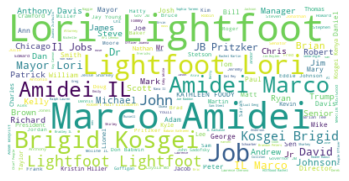

In [115]:
from wordcloud import WordCloud 
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [107]:
people_df_pos['Entity'].value_counts()

Lori Lightfoot                                          149
Marco Amidei                                            112
Lightfoot                                                84
Brigid Kosgei                                            56
Marco Amidei IL                                          47
                                                       ... 
Jason ScheffDrums Daniel SeraphineGuitar Buzz Feiten      1
Lil Zim                                                   1
weekJeff Cox                                              1
Alison Ruttan                                             1
Antonio PerezChicago TribuneThis                          1
Name: Entity, Length: 2358, dtype: int64

In [104]:
people_df_pos_uni['Entity'][0:20]

3394                   Lightfoot
3452              Lori Lightfoot
667                Brigid Kosgei
3617                Marco Amidei
3558                     Madonna
283                Anthony Davis
1944                 Geoff Burke
3416                      Lionel
3618             Marco Amidei IL
3154              Kimberly Clark
4850                         Sam
4531                Ralph Lauren
2425             James H Jimenez
3375    Leonard Alfred Schneider
2781             Johnson Johnson
1577                Dylan Strome
777                        Cablk
1223                Daniel Mears
5409        Tony GonzalesOakland
221                Andre Curbelo
Name: Entity, dtype: object

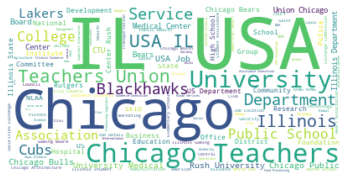

In [169]:
text_1 = ",".join(review for review in org_df_pos['Entity'])
wordcloud_1 = WordCloud(background_color="white").generate(text_1)

# Display the generated image:
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [170]:
org_df_pos['Entity'].value_counts()[0:20]

IL USA                            192
Chicago Teachers Union             72
Blackhawks                         42
Cubs                               37
Chicago Bulls                      32
Lakers                             30
SEIU                               25
Bears                              24
CTU                                22
Chicago Public Schools             20
Chicago Bears                      17
Chicago Teachers                   16
Rush University Medical Center     15
IL USA Jobs                        14
Rutgers                            13
NCAA                               11
KPMG                               11
US Department                      11
Securities Exchange Commission     10
White Sox                          10
Name: Entity, dtype: int64

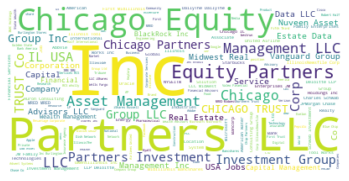

In [171]:
text_2 = ",".join(review for review in com_df_pos['Entity'])
wordcloud_2 = WordCloud(background_color="white").generate(text_2)

# Display the generated image:
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [172]:
com_df_pos['Entity'].value_counts()[0:20]

Chicago Equity Partners LLC              155
MRED                                      67
CHICAGO TRUST Co                          58
Midwest Real Estate Data LLC              47
Nuveen Asset Management LLC               46
Chicago Partners Investment Group LLC     45
Vanguard Group Inc                        43
DailyThe                                  43
BlackRock Inc                             38
IL USA Jobs                               35
Microsoft                                 32
NYSEITW                                   30
JM Family Enterprises                     28
IllinoisNewsfile Corp                     27
Oracle                                    27
CTU                                       25
Chicago Partners Investment Group         25
IBM                                       24
Huron Consulting Group                    23
Deloitte LLP                              23
Name: Entity, dtype: int64